<a href="https://colab.research.google.com/github/SebastianJaramilloo/Tareas_Aprendizaje_Automatico-/blob/main/Tareas/Taller_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                David Jaramillo &bull; 2026 - 01 - 04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [43]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/SebastianJaramilloo/Tareas_Aprendizaje_Automatico-/refs/heads/main/data/players_21.csv')
print(data.head())
print(data.describe())

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...   lwb   ldm  \
0        170         72   Argentina         FC Barc

In [45]:
data = data.dropna(subset=['team_position'])

In [46]:
numeric_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

In [47]:
# Eliminar filas con valores faltantes
data = data.dropna(subset=numeric_cols + ['team_position'])

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(data[numeric_cols])
y = data['team_position']


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
k_values = range(1, 20)
precisions = []

In [51]:
for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    precisions.append(accuracy_score(y_test, y_pred))

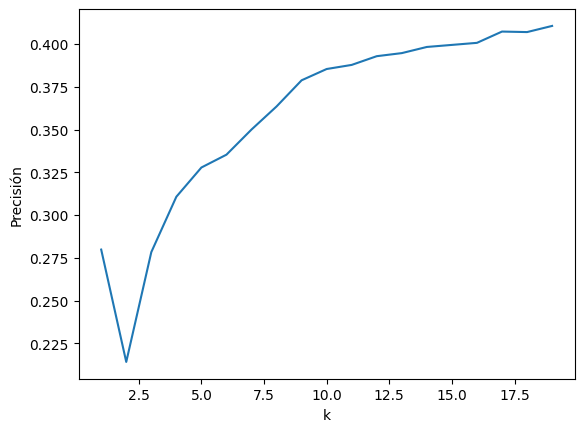

In [52]:
plt.plot(k_values, precisions)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.show()

In [53]:
mejor_k = k_values[precisions.index(max(precisions))]
print("Mejor valor de k:", mejor_k)

Mejor valor de k: 19


La precisión va subiendo poco a poco a medida que aumentamos el valor de k. Cuando k es muy pequeño el modelo funciona peor, pero cuando usamos más vecinos empieza a mejorar. El mejor resultado se da con k = 19, que es donde la precisión llega a su valor más alto.
En pocas palabras, el modelo funciona mejor cuando toma en cuenta a más jugadores “vecinos” para decidir la posición, y por eso k=19 termina siendo el más adecuado en este caso.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [54]:
modelo = KNeighborsClassifier(n_neighbors=mejor_k)
modelo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [55]:
y_pred = modelo.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.41061787642471503


In [57]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[   1    0    0    0    0    0    0    0    1    0    0    1    0    0
     0    0    0    0    1    0    2    0    1    0    1    0    0   49]
 [   0    0    0    0    0    0    0    2    1    0    0    0    0    0
     0    0    0    4    0    0    0    0    0    0    0    0    0   19]
 [   0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    2    2    2    1    0    0    0    0    0    0    0   28]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    1    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    1    0    1    0    1    0    0    0    0   11]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   0    0    0    0    0    0    7    0    0    0    0    0    0    0
     0    0    2    1    0    0    3 

In [58]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

         CAM       0.11      0.02      0.03        57
          CB       0.00      0.00      0.00        26
         CDM       0.00      0.00      0.00        36
          CF       0.00      0.00      0.00         2
          CM       0.00      0.00      0.00        15
         LAM       0.00      0.00      0.00         5
          LB       0.18      0.06      0.09       111
         LCB       0.27      0.17      0.21       136
         LCM       0.12      0.02      0.04        85
         LDM       0.00      0.00      0.00        50
          LF       0.00      0.00      0.00         2
          LM       0.07      0.01      0.02        84
          LS       0.00      0.00      0.00        45
          LW       0.00      0.00      0.00        34
         LWB       0.00      0.00      0.00        16
         RAM       0.00      0.00      0.00         5
          RB       0.26      0.14      0.18       111
 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


La matriz de confusión se ve muy grande porque la variable team_position tiene muchísimas clases distintas. Por eso aparece una fila y una columna para cada posición posible. La mayoría de los valores quedan en cero porque el modelo casi siempre acierta solo unas pocas posiciones y falla en la mayoría de las demás. Esto muestra que al modelo le cuesta bastante distinguir entre todas las posiciones posibles, ya que algunas son muy parecidas o tienen muy pocos ejemplos.

---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [59]:
data = pd.read_csv("https://raw.githubusercontent.com/SebastianJaramilloo/Tareas_Aprendizaje_Automatico-/refs/heads/main/data/players_21.csv")
print(data.head())

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...   lwb   ldm  \
0        170         72   Argentina         FC Barc

In [60]:
print(data.describe())

           sofifa_id           age     height_cm     weight_kg   league_rank  \
count   18944.000000  18944.000000  18944.000000  18944.000000  18719.000000   
mean   226242.402872     25.225823    181.190773     75.016892      1.357070   
std     27171.091056      4.697354      6.825672      7.057140      0.739327   
min        41.000000     16.000000    155.000000     50.000000      1.000000   
25%    210030.500000     21.000000    176.000000     70.000000      1.000000   
50%    232314.500000     25.000000    181.000000     75.000000      1.000000   
75%    246760.250000     29.000000    186.000000     80.000000      1.000000   
max    258970.000000     53.000000    206.000000    110.000000      4.000000   

            overall     potential     value_eur       wage_eur  \
count  18944.000000  18944.000000  1.894400e+04   18944.000000   
mean      65.677787     71.086729  2.224813e+06    8675.852513   
std        7.002278      6.109985  5.102486e+06   19654.774894   
min       47.00

In [61]:
numeric_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
target_col = 'overall'

data = data[numeric_cols + [target_col]]

In [62]:
data = data.dropna()

In [63]:
scaler = StandardScaler()
X = scaler.fit_transform(data[numeric_cols])
y = data[target_col]


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [65]:
k_values = range(1, 20)
errors = []

In [66]:
for k in k_values:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

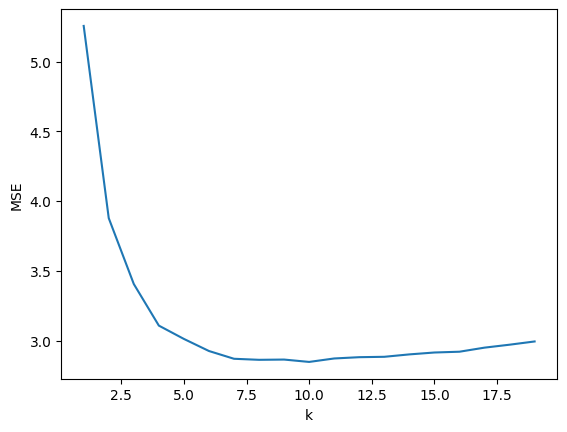

In [67]:
plt.plot(k_values, errors)
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()

In [68]:
mejor_k = k_values[errors.index(min(errors))]
print("Mejor valor de k:", mejor_k)

Mejor valor de k: 10


Lo que se ve en la gráfica es que el error baja bastante cuando aumentamos k desde valores muy pequeños. A partir de ahí el MSE sigue disminuyendo hasta llegar más o menos a k = 10, que es donde el error es el más bajo. Después de ese punto el error empieza a subir un poco otra vez.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [69]:
modelo = KNeighborsRegressor(n_neighbors=mejor_k)
modelo.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [70]:
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 2.8466706196264453


El modelo con k = 10 dio un MSE de 2.84, lo que significa que, en promedio, el error cuadrático que comete al predecir la variable no es muy grande. No es un error perfecto, pero está dentro de un rango razonable considerando que solo usamos unas pocas estadísticas del jugador para intentar estimar su valor general. En resumen, el modelo funciona decentemente, aunque todavía tiene algo de margen para mejorar.